 **Setup & Data Loading**

In [1]:
# ==================== 📂 Mount Drive ====================
from google.colab import drive
drive.mount('/content/drive')

# ==================== 📂 Imports ====================
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, EfficientNetB0, InceptionV3
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

# ==================== 📂 Paths & Parameters ====================
project_path = "/content/drive/MyDrive/Brain_Tumor_Detection_Project/BrainTumorMRIDataset"
train_dir = os.path.join(project_path, "Training")
test_dir = os.path.join(project_path, "Testing")
IMG_SIZE = 224
BATCH_SIZE = 32

# ==================== 📂 Generators ====================
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 5722 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


**Train With Transfer Learning Concepts**

In [ ]:
# ==================== 📜 Model Selection ====================
model_name = "EfficientNetB0"  # change to ResNet50, EfficientNetB0, InceptionV3

base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False  # freeze

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer=Adam(1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=15
)

# ==================== 🧪 Evaluate ====================
loss, acc = model.evaluate(test_generator)
print(f"{model_name} Test accuracy: {acc*100:.2f}%")

# Save evaluation results
os.makedirs("/content/drive/MyDrive/Brain_Tumor_Detection_Project/results", exist_ok=True)
# Final training accuracy and loss from the last epoch
train_acc = history.history['accuracy'][-1]
train_loss = history.history['loss'][-1]

# Evaluate on test data
test_loss, test_acc = model.evaluate(test_generator)

# Prepare result string
result_str = (
    f"Train Accuracy: {train_acc * 100:.2f}%\n"
    f"Train Loss: {train_loss:.4f}\n"
    f"Test Accuracy: {test_acc * 100:.2f}%\n"
    f"Test Loss: {test_loss:.4f}\n"
)

# Print to console
print(result_str)
# Save Model
model.save(f"/content/drive/MyDrive/Brain_Tumor_Detection_Project/models/{model_name}_brain_tumor_model.keras")

# Save evaluation results to file
with open(
    f"/content/drive/MyDrive/Brain_Tumor_Detection_Project/results/{model_name}_evaluation_results.txt",
    "w"
) as f:
    f.write(result_str)

# Plot Training History — Save as PNGs
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title(f'{model_name} Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(f"/content/drive/MyDrive/Brain_Tumor_Detection_Project/results/{model_name}_accuracy_plot.png")
plt.close()

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title(f'{model_name} Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig(f"/content/drive/MyDrive/Brain_Tumor_Detection_Project/results/{model_name}_loss_plot.png")
plt.close()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 2284s 13s/step - accuracy: 0.2689 - loss: 1.6763 - val_accuracy: 0.3089 - val_loss: 1.3859
Epoch 2/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 91s 510ms/step - accuracy: 0.2849 - loss: 1.3860 - val_accuracy: 0.3089 - val_loss: 1.3855
Epoch 3/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 90s 506ms/step - accuracy: 0.2680 - loss: 1.3859 - val_accuracy: 0.3089 - val_loss: 1.3851
Epoch 4/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 91s 506ms/step - accuracy: 0.2784 - loss: 1.3854 - val_accuracy: 0.3089 - val_loss: 1.3848
Epoch 5/15
 10/179 ━━━━━━━━━━━━━━━━━━━━ 1:12 432ms/step - accuracy: 0.2608 - loss: 1.3855

41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 227ms/step


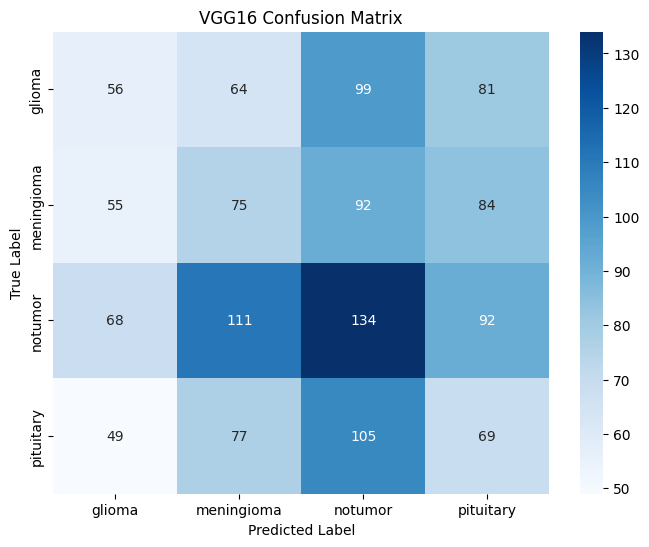

              precision    recall  f1-score   support

      glioma       0.25      0.19      0.21       300
  meningioma       0.23      0.25      0.24       306
     notumor       0.31      0.33      0.32       405
   pituitary       0.21      0.23      0.22       300

    accuracy                           0.25      1311
   macro avg       0.25      0.25      0.25      1311
weighted avg       0.25      0.25      0.25      1311



In [5]:
# ==================== 🧪 Confusion Matrix & Classification Report ====================
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Get true labels and predictions
Y_true = test_generator.classes
Y_pred_probs = model.predict(test_generator)
Y_pred = np.argmax(Y_pred_probs, axis=1)

# Confusion matrix
cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title(f"{model_name} Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig(f"/content/drive/MyDrive/Brain_Tumor_Detection_Project/results/{model_name}_confusion_matrix.png")
plt.show()
plt.close()

# Classification report
report = classification_report(Y_true, Y_pred, target_names=test_generator.class_indices.keys())
print(report)

# Save to file
with open(f"/content/drive/MyDrive/Brain_Tumor_Detection_Project/results/{model_name}_classification_report.txt", "w") as f:
    f.write(report)


**Testing on Image**

In [6]:
# ==================== 🧪 Test on Single Image ====================
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = "/content/drive/MyDrive/Brain_Tumor_Detection_Project/BrainTumorMRIDataset/Testing/meningioma/Te-meTr_0001.jpg"
img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
img_arr = image.img_to_array(img) / 255.0
img_arr = np.expand_dims(img_arr, axis=0)

pred = model.predict(img_arr)
class_idx = np.argmax(pred, axis=1)[0]

class_labels = list(train_generator.class_indices.keys())  # list of class names
print(f"Predicted class: {class_labels[class_idx]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class: meningioma
